<a href="https://colab.research.google.com/github/AlimamHu/Iris-Flowers-Classification-ML-Project/blob/main/iris_flowes_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Iris all classification model check which accuressy high



# 2) The goal of any machine learning problem is to find a single model that will best predict our wanted outcome

## Information Extrecting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
data_df=sns.load_dataset('iris')

In [4]:
data_df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [5]:
data_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

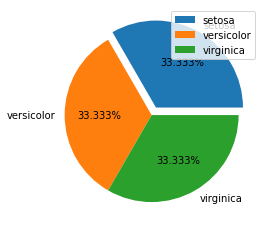

In [6]:
plt.pie(data_df.species.value_counts(), labels=['setosa', 'versicolor', 'virginica'],explode =[0.1,0,0],autopct='%1.3f%%');
plt.legend()
plt.show()

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


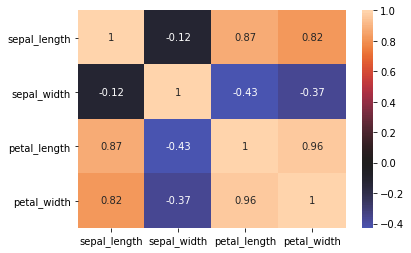

In [8]:
sns.heatmap(data_df.corr(),annot=True,center=False)
plt.show()

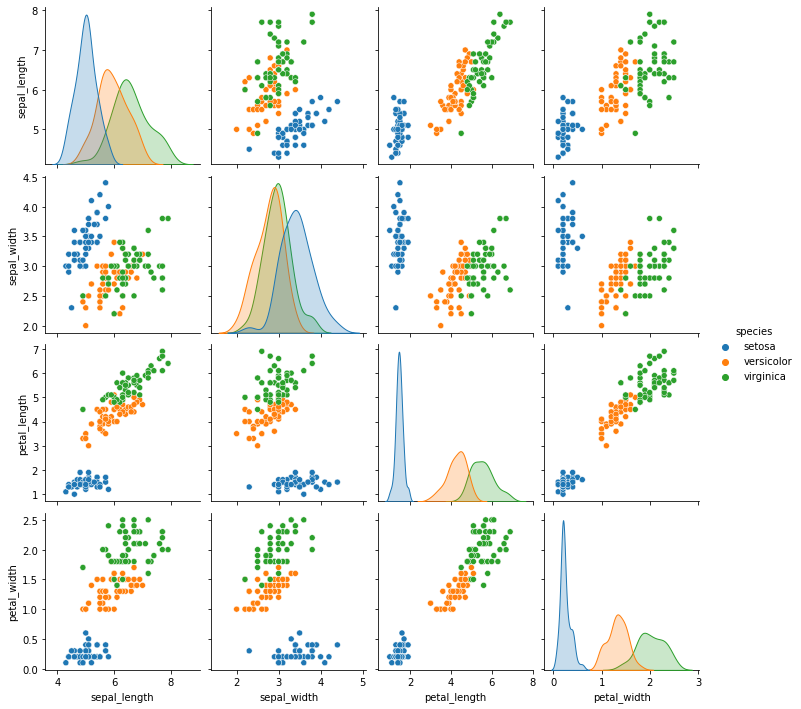

In [63]:
sns.pairplot(data_df,hue='species');

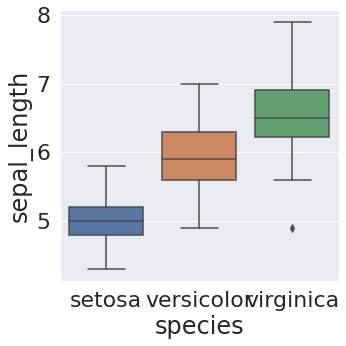

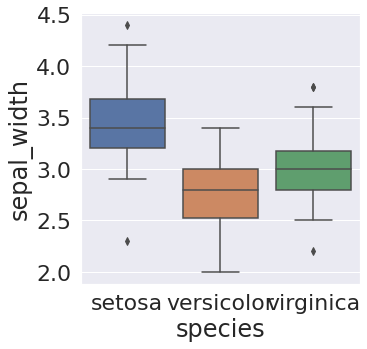

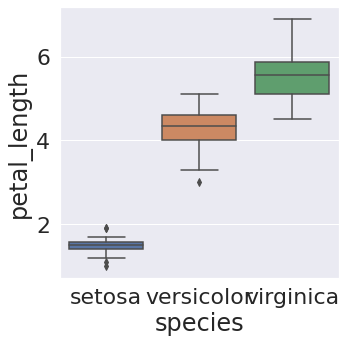

In [81]:
sns.set(font_scale=2)
for i in data_df.columns[0:3]:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=data_df,x='species',y=i,)

# logistic Regression 

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
X_full_dataSet=data_df.drop('species',axis=1)
Y_full_dataSet=data_df.species

## Train & Test

In [12]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_full_dataSet,Y_full_dataSet, random_state=42,test_size=.20)

In [13]:
log_model_train_Test=LogisticRegression(max_iter=1000,fit_intercept=True)

In [14]:
log_model_train_Test.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_predict_values_train_test=log_model_train_Test.predict(Xtest)

In [16]:
accuracy_score(log_predict_values_train_test,Ytest)

1.0

##  logistic-Cross validation

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_model_train_Test,X_full_dataSet,Y_full_dataSet,cv=5,)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [18]:
cross_val_score(log_model_train_Test,X_full_dataSet,Y_full_dataSet,cv=5,).mean()

0.9733333333333334

# SVM 

In [19]:
from sklearn.svm import SVC
svm_model_train=SVC(random_state=40,shrinking=True)

In [20]:
svm_model_train.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=40, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
svm_predict_Y=svm_model_train.predict(Xtest)

In [22]:
svm_model_train.score(Xtrain,Ytrain)

0.975

## SVM-Cross validation

In [23]:
cross_val_score(svm_model_train,X_full_dataSet,Y_full_dataSet,cv=5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [24]:
cross_val_score(svm_model_train,X_full_dataSet,Y_full_dataSet,cv=5).mean()

0.9666666666666666

# kneighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knei_n=[]
for i in range(1,20): 
    kneigh_model_train=KNeighborsClassifier(n_neighbors=i)
    kneigh_model_train.fit(Xtrain,Ytrain)
    KNei_predict_Y=kneigh_model_train.predict(Xtest)

    knei_n.append(kneigh_model_train.score(Xtrain,Ytrain))

(1.0, 20.0)

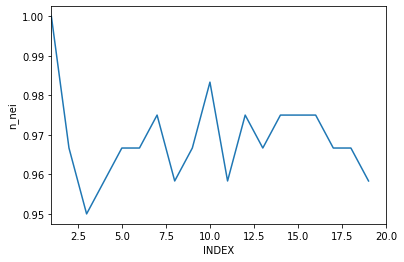

In [27]:
plt.plot(range(1,20),knei_n,);
plt.ylabel('n_nei')
plt.xlabel('INDEX')
plt.xlim(1,20)

In [28]:
kneigh_model_train=KNeighborsClassifier(n_neighbors=1)
kneigh_model_train.fit(Xtrain,Ytrain)
KNei_predict_Y=kneigh_model_train.predict(Xtest)

In [29]:
kneigh_model_train.score(Xtrain,Ytrain)

1.0

## Kneighbor-cross-valudataion

In [30]:
cross_val_score(kneigh_model_train,X_full_dataSet,Y_full_dataSet,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [31]:
cross_val_score(kneigh_model_train,X_full_dataSet,Y_full_dataSet,cv=5).mean()

0.96

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
Decision_model_train=DecisionTreeClassifier()

In [33]:
Decision_model_train.fit(Xtrain,Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
Decision_model_train.score(Xtrain,Ytrain)

1.0

In [35]:
Decision_predict_Y=Decision_model_train.predict(Xtest)

In [36]:
Decision_model_train.score(Xtrain,Ytrain)

1.0

In [37]:
accuracy_score(Decision_predict_Y,Ytest)

1.0

## Decission-cross-validation

In [38]:
cross_val_score(Decision_model_train,X_full_dataSet,Y_full_dataSet,cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [39]:
cross_val_score(Decision_model_train,X_full_dataSet,Y_full_dataSet,cv=5).mean()

0.9666666666666668

# Accuressy of model & cross-valudataion
most of model accuressy is 100% 

                                            Now you can see the accuressy of few model

| model | accuressy |fold 1 | fold 2| fold 3|fold 4| fold 5|mean|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|Decision Tree|1|0.96666667| 0.96666667| 0.9       | 0.96666667| 1.        |0.9600000000000002|
|kNeigh|1|0.96666667| 0.96666667| 0.93333333| 0.93333333| 1.        |0.96|
|logistic|1|0.96666667| 1.        | 0.93333333| 0.96666667| 1.|0.9733333333333334|        
|svm|.975|0.96666667| 0.96666667| 0.96666667| 0.93333333| 1.        |0.9666666666666666|

# Esemble Methods

In [40]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 =SVC(random_state=40,shrinking=True)
model3=KNeighborsClassifier(n_neighbors=1)
model4=DecisionTreeClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('gnb',model3),('ndn',model4)], voting='hard')
model.fit(Xtrain,Ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('dt',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decis...
                              DecisionTreeClassifier(ccp_alpha=0.0,
       

In [41]:
model.score(Xtest,Ytest)

1.0

In [42]:
esamble_predict_y=model.predict(Xtest)

All estimated value is here by model

    log_predict_values_train_test
    svm_predict_Y
    KNei_predict_Y
    Decision_predict_Y

In [43]:
#@title Double tap to see the code. background process
#@  
from scipy import stats
final_pred = np.array([])
for i in range(0,len(Xtest)):
    final_pred=np.append(final_pred,stats.mode([log_predict_values_train_test[i],svm_predict_Y[i],KNei_predict_Y[i],Decision_predict_Y[i]]))
# removing the '4'
without_4=np.array([])
for i in final_pred:
    if '4'==i:
        pass
    else:
        without_4=np.append(without_4,i)

In [44]:
accuracy_score(Ytest,esamble_predict_y)

1.0

## Confusion Matrix 
* lots of way to do one thing (different way of thing give the way)

In [45]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(Ytest,esamble_predict_y,labels=None)

In [50]:
pd.crosstab(Ytest,esamble_predict_y,margins=True)
# sns.heatmap(pd.crosstab(Ytest,esamble_predict_y,),annot=True);

col_0,setosa,versicolor,virginica,All
species,,,,
setosa,10,0,0,10
versicolor,0,9,0,9
virginica,0,0,11,11
All,10,9,11,30


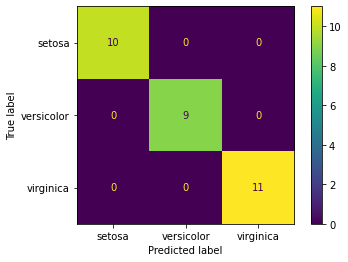

In [62]:
#@title confusion matrix with ploting just tow line
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,Xtest,Ytest,)

#### Now we have one model which have 100 persentage of accuressy get. :)